In [1]:

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
#from tf.keras.preprocessing.image import ImageDataGenerator

# from model_NO_AF import model_maker
# from model_ALL_RELU import model_maker
#from model_ALL_TANH import model_maker+
# from model_ALL_MISH import model_maker
# from model_ALL_SMISH import model_maker

# from model_TEED_RELU import model_maker
# from model_TEED_TANH import model_maker
# from model_TEED_MISH import model_maker
from model_TEED_SMISH import model_maker
# from model import model_maker



print(tf.__version__)
print(keras.__version__)


2.17.0
3.5.0


In [2]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history["accuracy"]) #'acc'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [3]:
def dataset_maker(dataset_name):
    
    if dataset_name =="cifar10":
        # train 50000, 10000
        (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
        #x_train=x_train.astype("float32")  
    	#x_test=x_test.astype("float32")
        
        mean=np.mean(x_train)
        std=np.std(x_train)
        x_test=(x_test-mean)/std
        x_train=(x_train-mean)/std
        
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
        
        x_train = x_train.reshape((50000, 32, 32, 3))
        x_test = x_test.reshape((10000, 32, 32, 3))
        
        return [x_train,y_train], [x_test, y_test]
    
    elif dataset_name =="cifar100":
        # train 50000, 10000
        (x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
        
        mean=np.mean(x_train)
        std=np.std(x_train)
        x_test=(x_test-mean)/std
        x_train=(x_train-mean)/std
        
        class_names = ["airplane", "automobile", "bird", "cat", "deer", 
                       "dog", "frog", "horse", "ship", "truck"]
        
        x_train = x_train.reshape((50000, 32, 32, 3))
        x_test = x_test.reshape((10000, 32, 32, 3))
        
        return [x_train,y_train], [x_test, y_test]
    
    else:
        
        print("Unrecognized dataset")
        


In [4]:
dataset_name = ["mnist","mnist_fashion","cifar10", "cifar100"]
data = dataset_name[3]

if data=="cifar10" or data=="cifar100":
    image_size =(32, 32,3) 
else:
    image_size = (28, 28,1)
    
batch_size = 32
N_classes = 100 if data=="cifar100" else 10

training, testing = dataset_maker(data)
x_train, y_train = training
x_test, y_test = testing

print(data,"data size")
print("Training:", x_train.shape, y_train.shape)
print("Testing:", x_test.shape, y_test.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, N_classes)
y_test = keras.utils.to_categorical(y_test, N_classes)
print("Target size", data,image_size)
print("Training:", y_train.shape)
print("Testing:", y_test.shape)

model = model_maker(image_size,N_classes)
# keras.utils.plot_model(model, show_shapes=True)
model.summary()


cifar100 data size
Training: (50000, 32, 32, 3) (50000, 1)
Testing: (10000, 32, 32, 3) (10000, 1)
Target size cifar100 (32, 32, 3)
Training: (50000, 100)
Testing: (10000, 100)



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape           ┃      Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer) │ (None, 32, 32, 3)      │            0 │ -                      │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d (Conv2D)          │ (None, 16, 16, 16)     │          448 │ input_layer[0][0]      │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ k_smish (k_smish)        │ (None, 16, 16, 16)     │            0 │ conv2d[0][0]           │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)        │ (None, 16, 16, 16)     │        2,320 │ k_smish[0][0]          │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ k_smish_1 (k_smish)      │ (None, 16, 16, 16)     │            0 │ conv2d_1[0][0]         │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ max_pooling2d            │ (None, 8, 8, 16)       │            0 │ k_smish_1[0][0]        │
│ (MaxPooling2D)           │                        │              │                        │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)        │ (None, 8, 8, 32)       │        4,640 │ max_pooling2d[0][0]    │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ k_smish_2 (k_smish)      │ (None, 8, 8, 32)       │            0 │ conv2d_3[0][0]         │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)        │ (None, 8, 8, 32)       │          544 │ k_smish_1[0][0]        │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)        │ (None, 8, 8, 32)       │        9,248 │ k_smish_2[0][0]        │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ add (Add)                │ (None, 8, 8, 32)       │            0 │ conv2d_2[0][0],        │
│                          │                        │              │ conv2d_4[0][0]         │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ k_smish_3 (k_smish)      │ (None, 8, 8, 32)       │            0 │ add[0][0]              │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)        │ (None, 8, 8, 48)       │       13,872 │ k_smish_3[0][0]        │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ k_smish_4 (k_smish)      │ (None, 8, 8, 48)       │            0 │ conv2d_6[0][0]         │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)        │ (None, 8, 8, 48)       │       20,784 │ k_smish_4[0][0]        │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)        │ (None, 8, 8, 48)       │        1,584 │ conv2d_4[0][0]         │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ average (Average)        │ (None, 8, 8, 48)       │            0 │ conv2d_7[0][0],        │
│                          │                        │              │ conv2d_5[0][0]         │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ k_smish_5 (k_smish)      │ (None, 8, 8, 48)       │            0 │ average[0][0]          │
├──────────────────────────┼────────────────────────┼──────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)        │ (None, 8, 8, 48)       

 Total params: 298,180 (1.14 MB)

 Trainable params: 298,180 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# set up image augmentation
#datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#    rotation_range=15,
##    horizontal_flip=True,
#    width_shift_range=0.1,
#    height_shift_range=0.1,
 #   validation_split=0.15,
#    #zoom_range=0.3
#    )
#datagen.fit(x_train)

#datagen = keras.Sequential([
    #keras.layers.RandomFlip("horizontal"),
    #keras.layers.RandomFlip("vertical"),
#    keras.layers.RandomFlip("horizontal_and_vertical"),
 #   keras.layers.RandomContrast(0.2)
#], name='data_augmentation'    
#)

#datagen.fit(x_train)


In [6]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
epochs = 100  # 5, 10, 15, 20
n_batches = 32

# compile the model
# model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
#               optimizer=keras.optimizers.AdamW(), 
#               metrics=[keras.metrics.SparseCategoricalAccuracy()]) # second optimizer

#model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
#              optimizer=keras.optimizers.AdamW(learning_rate=0.0001), 
#              metrics=[keras.metrics.SparseTopKCategoricalAccuracy(k=1)]) # second optimizer and accuracy
#model.compile(loss=keras.losses.CategoricalCrossentropy(), 
#              optimizer=keras.optimizers.AdamW(learning_rate=0.0001), 
#              metrics=[keras.metrics.Accuracy()]) # second optimizer and accuracy
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.AdamW(learning_rate=0.001), metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001, weight_decay=2e-4),
              metrics=["accuracy"]) # lr 8e-5 2e-4 ["accuracy"]

image_size

(32, 32, 3)

In [7]:
# start training
history = model.fit(x_train, y_train, epochs=epochs,
                    validation_split=0.15,batch_size=n_batches,shuffle=True)# validation_split=0.2

Epoch 1/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.0770 - loss: 4.1080 - val_accuracy: 0.1937 - val_loss: 3.3844
Epoch 2/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2025 - loss: 3.2826 - val_accuracy: 0.2492 - val_loss: 3.0351
Epoch 3/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.2692 - loss: 2.9559 - val_accuracy: 0.2816 - val_loss: 2.8540
Epoch 4/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3063 - loss: 2.7417 - val_accuracy: 0.3292 - val_loss: 2.6815
Epoch 5/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3390 - loss: 2.5832 - val_accuracy: 0.3373 - val_loss: 2.5787
Epoch 6/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3737 - loss: 2.4387 - val_accuracy: 0.3552 - val_loss: 2.4894
Epoch 7/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3880 - loss: 2.3322 - val_accuracy: 0.3725 - val_loss: 2.4611
Epoch 8/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 

In [12]:
# start training econd way
history2=model.fit(datagen.flow(x_train, y_train, batch_size=n_batches),
                    steps_per_epoch = int(len(x_train) / n_batches),epochs=epochs) #,validation_data=(x_test, y_test)

Epoch 1/50
   3/1562 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.3594 - loss: 3.0849  

C:\Users\OFICINASMS09\miniconda3\envs\py310\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.3514 - loss: 2.6433
Epoch 2/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.3125 - loss: 2.6841 
Epoch 3/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:13 162ms/step - accuracy: 0.2500 - loss: 2.5871

C:\Users\OFICINASMS09\miniconda3\envs\py310\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3765 - loss: 2.4023
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.2500 - loss: 2.5395  
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3901 - loss: 2.3289
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.4375 - loss: 2.5801  
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4013 - loss: 2.2790
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.4062 - loss: 2.3729  
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4062 - loss: 2.2457
Epoch 10/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.3750 - loss: 2.6711  
Epoch 11/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4125 - loss: 2.2265
Epoch 12/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.5625 - loss: 1.8222  
Epoch 13/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4137 - loss: 2.1993
Epoch 14/50
1562/

In [8]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4214 - loss: 2.9118


[2.9515416622161865, 0.41519999504089355]

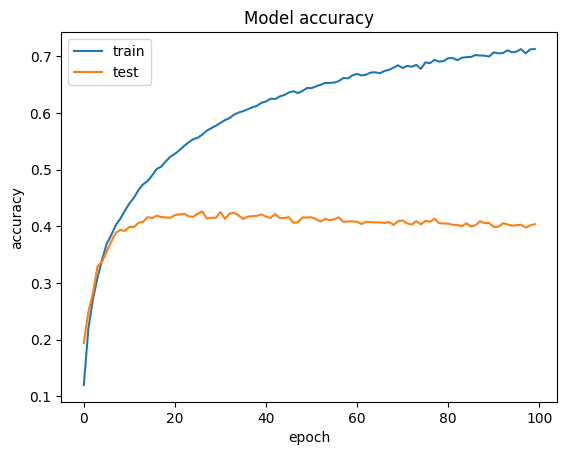

In [9]:
plothist(history)

In [20]:
#!pip install matplotlib